In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv('./data/iris.data', header=None)

names = ["SepalLength", "SepalWidth","PetalLength", "PetalWidth", "class"]
iris.columns = names

print(iris.shape)

(150, 5)


In [2]:
iris.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


1) 전체 데이터를 군집화할 K를 정하고 각 군집의 대표가 될 가상의 레이블인 무작위로 중심점 X와 Y 3개를 생성합니다.

① K개의 중심을 무작위로 생성하기 위해 꽃잎의 길이와 폭 데이터만을 가져와 서 무작위로 중심점 X와 Y 3개를 생성합니다.

In [3]:
XY = np.array(iris)
X = XY[:, 1:3]
X[1:3, :]

array([[3.0, 1.4],
       [3.2, 1.3]], dtype=object)

In [4]:
k = 3
C_x = np.random.choice(X[:,0],k)
C_y = np.random.choice(X[:,1],k)
C = np.array(list(zip(C_x, C_y)))
print(C)

[[3.  4.5]
 [2.9 1.4]
 [2.9 1.4]]


② 꽃잎의 길이와 폭 데이터와 중심점으로 잡은 세 점을 그래프로 나타냅니다.

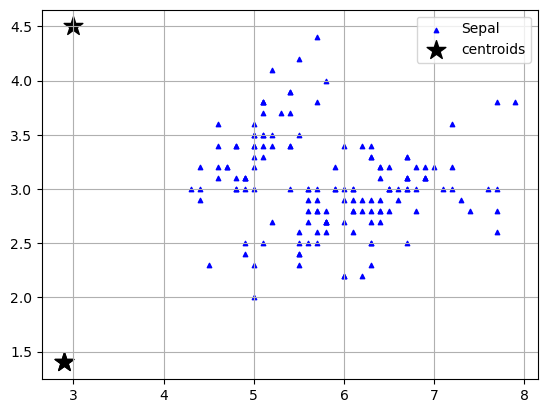

In [5]:
SepalLength = iris['SepalLength']
SepalWidth = iris['SepalWidth']
plt.title = ('SepalLength & SepalWidth')
plt.xlabel = ('SepalLength')
plt.ylabel = ('SepalWidth')
plt.scatter(SepalLength, SepalWidth, marker ='^', c='blue' , s=10 , label='Sepal')
plt.scatter(C_x,         C_y,        marker ='*', c='black', s=200, label='centroids')
plt.legend(loc = 'best')
plt.grid()
plt.show()

2) 각 데이터를 가장 가까운 중심점의 군집(cluster)에 할당하기

In [6]:
def Distance(A, B):
    return np.sqrt(np.sum(np.power((A-B),2)))

C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
flag = Distance(C, C_old)

In [ ]:
from copy import deepcopy

distacnces = []
while flag != 0 :
    for i in range(len(X)):
        for j in range(3):
            temp = Distance(X[i],C[j])
            distacnces.append(temp)
            
        cluster = np.argmin(distacnces)
        clusters[i] = cluster
        distacnces = []
        
    C_old = deepcopy(C)
    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points)
        
    flag = Distance(C, C_old)

In [ ]:
plt.title = ('SepalLength & SepalWidth')
plt.xlabel = ('SepalLength')
plt.ylabel = ('SepalWidth')
plt.scatter(X[clusters==0,0], X[clusters==0,1], s= 50, marker ='o', c='red' , label='A')
plt.scatter(X[clusters==1,0], X[clusters==1,1],        marker ='>', c='green', s=50, label='B')
plt.scatter(X[clusters==2,0], X[clusters==2,1],        marker ='^', c='blue', s=50, label='C')
plt.scatter(C[:,0], C[:,1],        marker ='*', c='black', s=50, label='Centroids')

plt.legend(loc = 'best')
plt.grid(True)
plt.show()